In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
market_share_data = pd.read_csv("data/market_share_data/2009_2025_combined_out.csv")
# If any column has only NA values, drop it
market_share_data.drop(labels=["OS X", "Unknown","Playstation","Nintendo","Other",
                        "iOS","Android","BlackBerry OS","Chrome OS"], axis=1, inplace=True)
market_share_data.dropna(axis=1, how="all", inplace=True)
market_share_data.head()

,Date,Windows,Linux,Unnamed: 10
0,2009-01,95.42,0.64,0.00
1,2009-02,95.39,0.62,0.00
2,2009-03,95.22,0.65,0.04
3,2009-04,95.13,0.66,0.08
4,2009-05,95.25,0.65,0.08


In [3]:
market_share_data.tail()

,Date,Windows,Linux,Unnamed: 10
187,2024-08,71.46,4.55,NaN
188,2024-09,73.35,4.48,NaN
189,2024-10,73.39,4.30,NaN
190,2024-11,72.94,4.04,NaN
191,2024-12,73.38,4.13,NaN


([<matplotlib.axis.YTick at 0x13b37dbe0>,
 [Text(0, 0, '0'),
  Text(0, 10, '10'),
  Text(0, 20, '20'),
  Text(0, 30, '30'),
  Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 70, '70'),
  Text(0, 80, '80'),
  Text(0, 90, '90'),
  Text(0, 100, '100')])

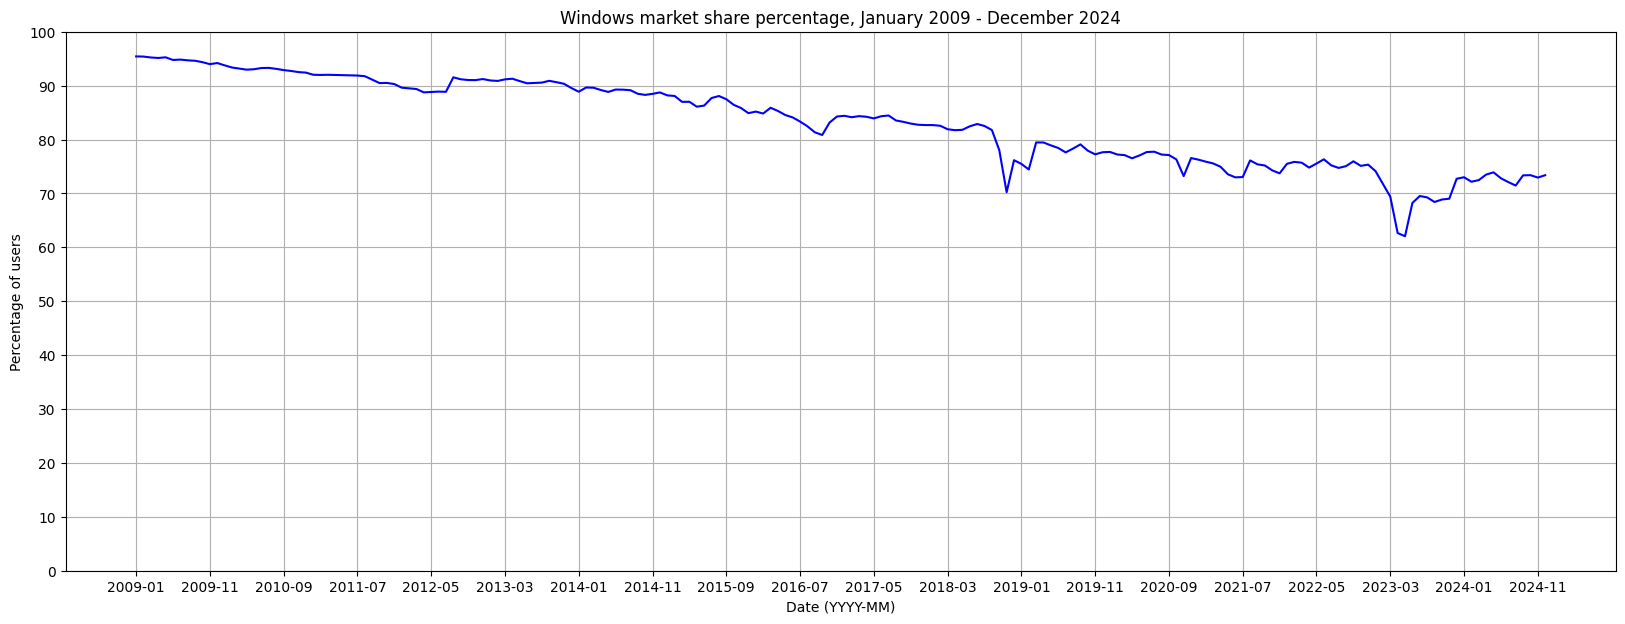

In [4]:
plt.figure(figsize=(20,7))
plt.grid(visible=True)
plt.ylim(0, 100)
plt.plot(market_share_data["Windows"], color="blue")
plt.title("Windows market share percentage, January 2009 - December 2024")
plt.xlabel("Date (YYYY-MM)")
plt.xticks(ticks=range(0, len(market_share_data["Date"]), 10), labels=market_share_data["Date"][::10])
plt.ylabel("Percentage of users")
plt.yticks(ticks=range(0, 101, 10))

([<matplotlib.axis.YTick at 0x13b57a350>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9'),
  Text(0, 10, '10')])

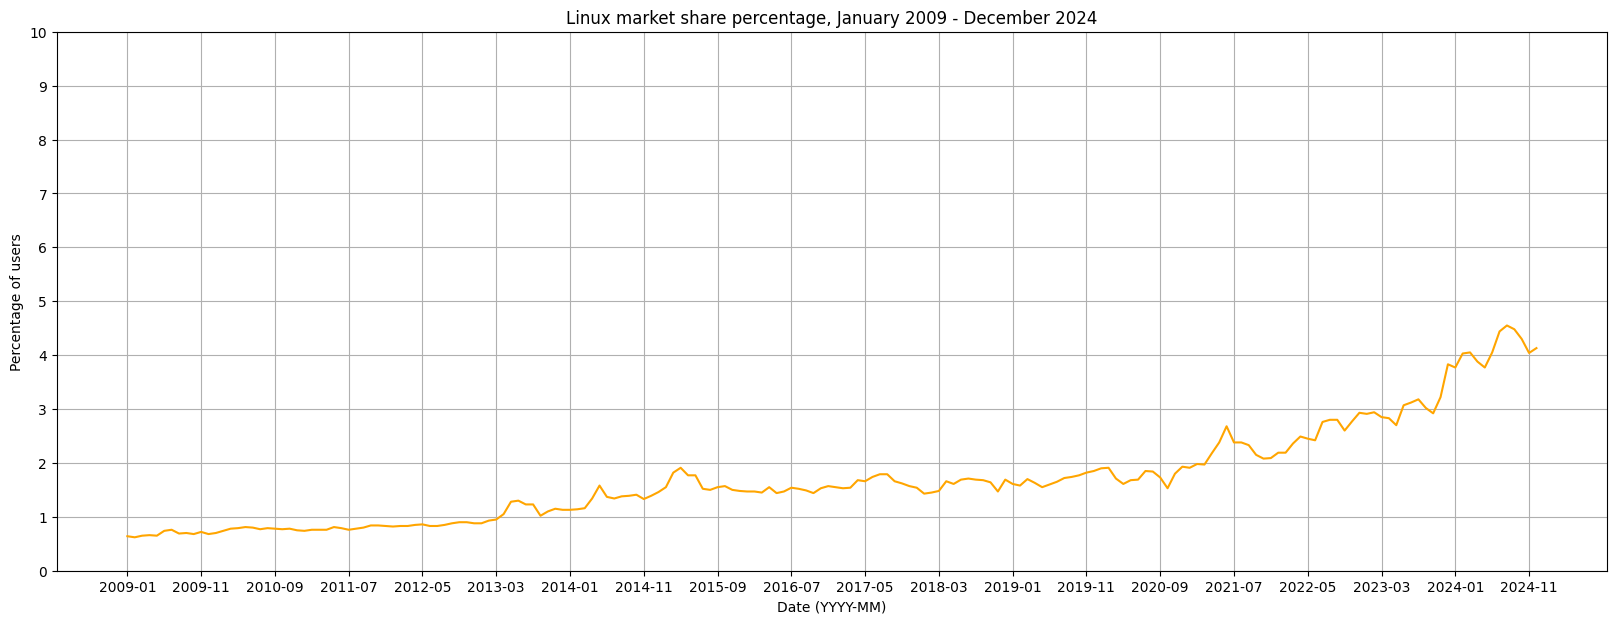

In [5]:
plt.figure(figsize=(20,7))
plt.grid(visible=True)
plt.ylim(0, 10)
plt.plot(market_share_data["Linux"], color="orange")
plt.title("Linux market share percentage, January 2009 - December 2024")
plt.xlabel("Date (YYYY-MM)")
plt.xticks(ticks=range(0, len(market_share_data["Date"]), 10), labels=market_share_data["Date"][::10])
plt.ylabel("Percentage of users")
plt.yticks(ticks=range(0, 11, 1))

Text(0, 0.5, 'Linux')

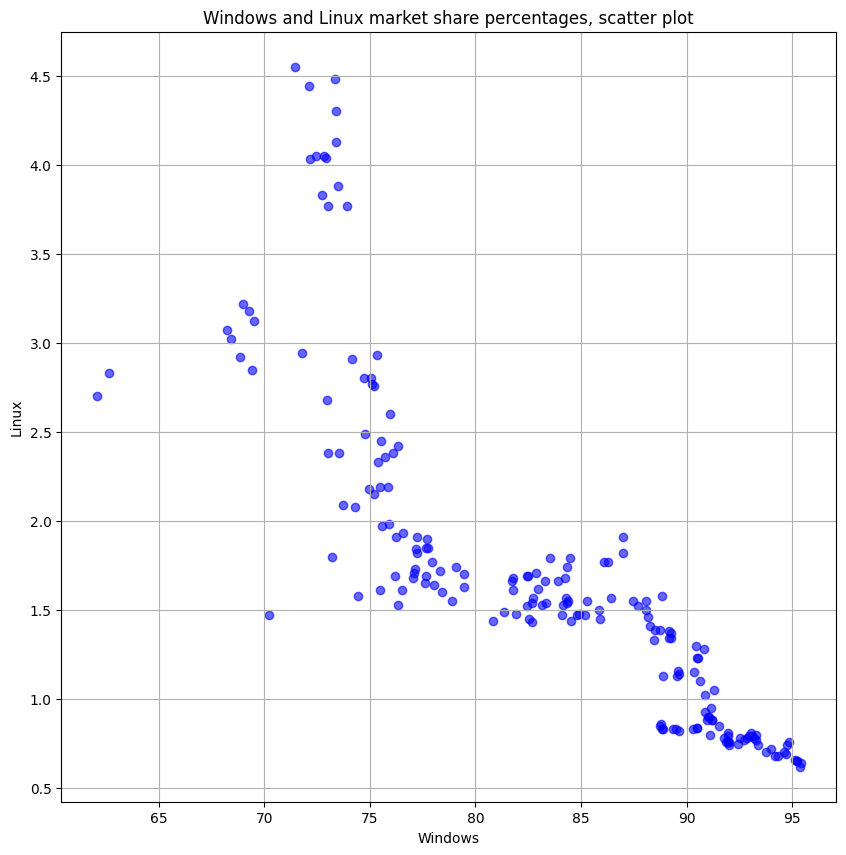

In [6]:
plt.figure(figsize=(10,10))
plt.grid(visible=True)
plt.scatter(market_share_data["Windows"], market_share_data["Linux"], c=["blue"], alpha=0.6)
plt.title("Windows and Linux market share percentages, scatter plot")
plt.xlabel("Windows")
plt.ylabel("Linux")

Windows market share mean:
Windows    83.144427
dtype: float64

Linux market share mean:
Linux    1.704948
dtype: float64


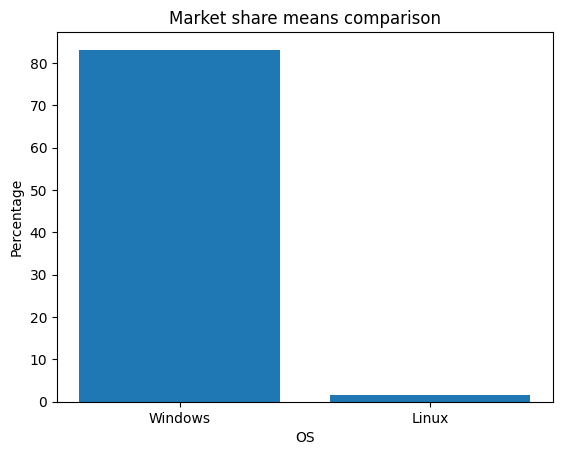

In [7]:
windows_marketshare_mean = market_share_data[["Windows"]].mean(axis=0,skipna=True)
linux_marketshare_mean = market_share_data[["Linux"]].mean(axis=0,skipna=True)

print(f"Windows market share mean:\n{windows_marketshare_mean}\n")
print(f"Linux market share mean:\n{linux_marketshare_mean}")

plt.bar(["Windows", "Linux"], [windows_marketshare_mean["Windows"], linux_marketshare_mean["Linux"]])
plt.title('Market share means comparison')
plt.xlabel('OS')
plt.ylabel('Percentage')
plt.show()

In [8]:
pageviews_data = pd.read_csv("data/wikipedia_pagevisit_counts/pageviews-20150701-20251124.csv")
# If any column has only NA values, drop it
pageviews_data.dropna(axis=1, how="all", inplace=True)
pageviews_data.drop(labels=["Windows XP"], axis=1, inplace=True)
pageviews_data.rename({"Red Hat Enterprise Linux": "RHEL"}, inplace=True)
print(pageviews_data.head())
print(pageviews_data.tail())

         Date  Linux  Debian  Ubuntu  Red Hat Enterprise Linux  Windows 7  \
0  2015-07-01   6043    1406     497                      1185       3990   
1  2015-07-02   6185    1294     551                      1167       4035   
2  2015-07-03   5393    1110     449                       827       3535   
3  2015-07-04   4756     913     385                       373       3122   
4  2015-07-05   4415     942     381                       422       3600   

   Windows 8  Windows 8.1  Windows Vista  Windows 10  
0       3172         2278           1928       14676  
1       3072         2271           1981       13737  
2       2754         2070           1681       12776  
3       2542         1904           1554       10930  
4       2678         2116           1810       12144  
            Date  Linux  Debian  Ubuntu  Red Hat Enterprise Linux  Windows 7  \
3795  2025-11-20   3892    1430    1693                       742       2718   
3796  2025-11-21   3496    1322    1568        

['2016-11-01', '2016-12-11', '2017-01-20', '2017-03-01', '2017-04-10', '2017-05-20', '2017-06-29', '2017-08-08']


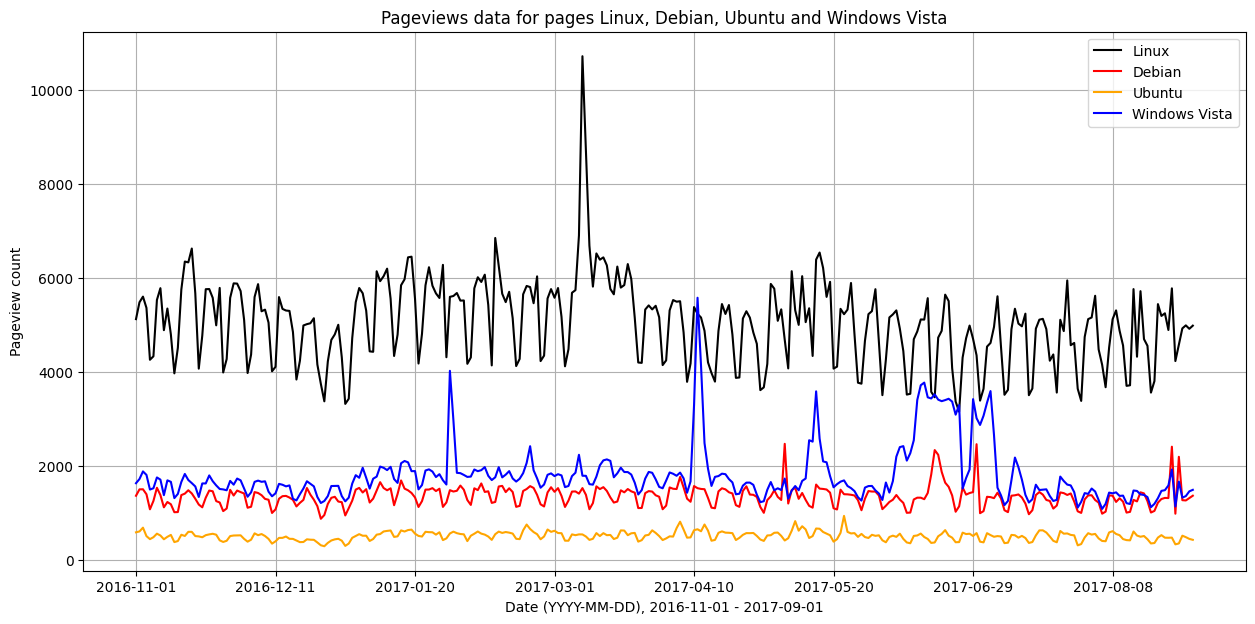

In [9]:
import datetime

plt.figure(figsize=(15,7))
plt.grid(visible=True)

data_start_period = datetime.date(year=2015, month=7, day=1)
winvista_start_period = datetime.date(year=2016, month=11, day=1)
winvista_end_period = datetime.date(year=2017, month=9, day=1)

number_of_days = (winvista_end_period-winvista_start_period).days
start_index = (winvista_start_period-data_start_period).days

plt.plot(pageviews_data["Linux"].iloc[start_index:start_index+number_of_days], color="black")
plt.plot(pageviews_data["Debian"].iloc[start_index:start_index+number_of_days], color="red")
plt.plot(pageviews_data["Ubuntu"].iloc[start_index:start_index+number_of_days], color="orange")
plt.plot(pageviews_data["Windows Vista"].iloc[start_index:start_index+number_of_days], color="blue")
plt.title("Pageviews data for pages Linux, Debian, Ubuntu and Windows Vista")

# End of support at 2017-04-11, so check the previous and the next period to observe the effect
plt.xlabel("Date (YYYY-MM-DD), 2016-11-01 - 2017-09-01")
x_labels = []
for i in range(8):
    x_labels.append(str(winvista_start_period + datetime.timedelta(days=40)*i))
    
print(x_labels)
plt.xticks(ticks=range(start_index, start_index+number_of_days, 40), labels=x_labels)
plt.ylabel("Pageview count")
plt.legend(["Linux", "Debian", "Ubuntu", "Windows Vista"])
plt.savefig("visuals/winwista_linux_debian_ubuntu_pageviews_plot.svg", format="svg")

There is a spike in pageviews count of Windows Vista around the end of support date (April 11, 2017).

['2019-08-01', '2019-09-10', '2019-10-20', '2019-11-29', '2020-01-08', '2020-02-17', '2020-03-28', '2020-05-07']


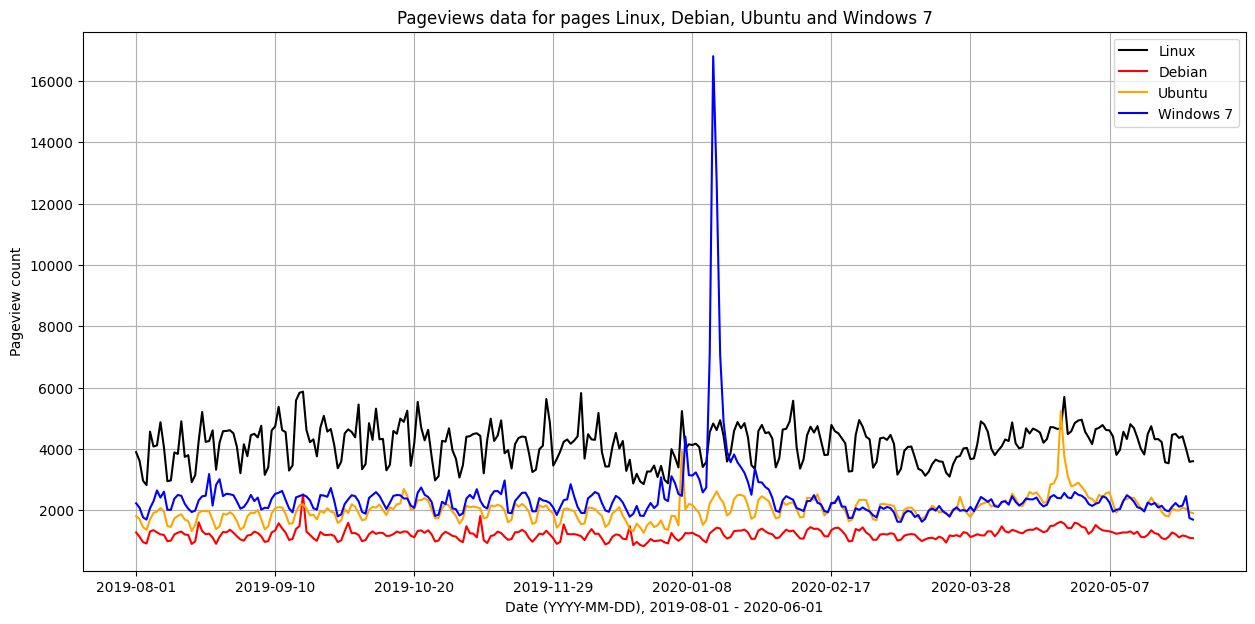

In [10]:
plt.figure(figsize=(15,7))
plt.grid(visible=True)

data_start_period = datetime.date(year=2015, month=7, day=1)
win7_start_period = datetime.date(year=2019, month=8, day=1)
win7_end_period = datetime.date(year=2020, month=6, day=1)

number_of_days = (win7_end_period-win7_start_period).days
start_index = (win7_start_period-data_start_period).days

plt.plot(pageviews_data["Linux"].iloc[start_index:start_index+number_of_days], color="black")
plt.plot(pageviews_data["Debian"].iloc[start_index:start_index+number_of_days], color="red")
plt.plot(pageviews_data["Ubuntu"].iloc[start_index:start_index+number_of_days], color="orange")
plt.plot(pageviews_data["Windows 7"].iloc[start_index:start_index+number_of_days], color="blue")
plt.title("Pageviews data for pages Linux, Debian, Ubuntu and Windows 7")

# End of support at 2020-01-14, so check the previous and the next period to observe the effect
plt.xlabel("Date (YYYY-MM-DD), 2019-08-01 - 2020-06-01")
x_labels = []
for i in range(8):
    x_labels.append(str(win7_start_period + datetime.timedelta(days=40)*i))
    
print(x_labels)
plt.xticks(ticks=range(start_index, start_index+number_of_days, 40), labels=x_labels)
plt.ylabel("Pageview count")
plt.legend(["Linux", "Debian", "Ubuntu", "Windows 7"])
plt.savefig("visuals/win7_linux_debian_ubuntu_pageviews_plot.svg", format="svg")

There is a spike in pageviews count of Windows 7 around the end of support date (January 14, 2020)

304
2588
['2022-08-01', '2022-09-10', '2022-10-20', '2022-11-29', '2023-01-08', '2023-02-17', '2023-03-29', '2023-05-08']


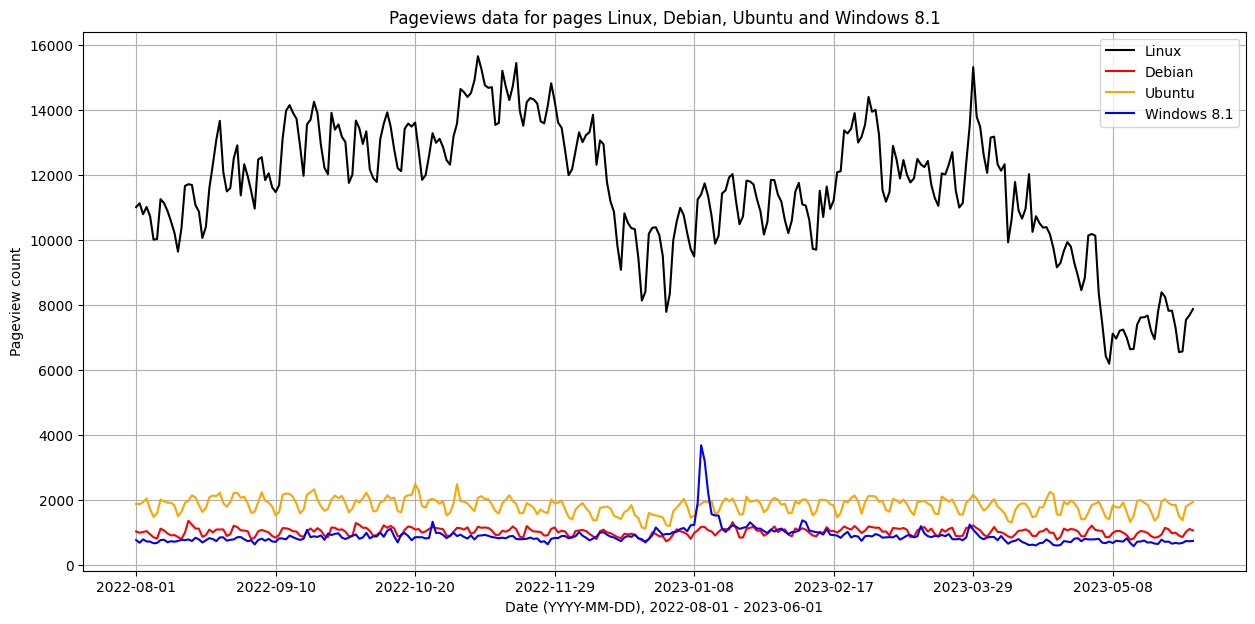

In [11]:
plt.figure(figsize=(15,7))
plt.grid(visible=True)

data_start_period = datetime.date(year=2015, month=7, day=1)
win81_start_period = datetime.date(year=2022, month=8, day=1)
win81_end_period = datetime.date(year=2023, month=6, day=1)

number_of_days = (win81_end_period-win81_start_period).days
start_index = (win81_start_period-data_start_period).days

print(number_of_days)
print(start_index)

plt.plot(pageviews_data["Linux"].iloc[start_index:start_index+number_of_days], color="black")
plt.plot(pageviews_data["Debian"].iloc[start_index:start_index+number_of_days], color="red")
plt.plot(pageviews_data["Ubuntu"].iloc[start_index:start_index+number_of_days], color="orange")
# plt.plot(pageviews_data["Windows 8"].iloc[start_index:start_index+number_of_days], color="blue")
plt.plot(pageviews_data["Windows 8.1"].iloc[start_index:start_index+number_of_days], color="blue")
plt.title("Pageviews data for pages Linux, Debian, Ubuntu and Windows 8.1")

# End of support at 2023-01-10 (Windows 8.1), so plot the previous and the next period (5 months before, 5 months after) to observe the effect
plt.xlabel("Date (YYYY-MM-DD), 2022-08-01 - 2023-06-01")
x_labels = []
for i in range(8):
    x_labels.append(str(win81_start_period + datetime.timedelta(days=40)*i))
    
print(x_labels)
plt.xticks(ticks=range(start_index, start_index+number_of_days, 40), labels=x_labels)
plt.ylabel("Pageview count")
plt.legend(["Linux", "Debian", "Ubuntu", "Windows 8.1"])
plt.savefig("visuals/winw81_linux_debian_ubuntu_pageviews_plot.svg", format="svg")

There is a spike in pageviews count of Windows 8.1 around the end of support date (January 10, 2023)

['2025-07-14', '2025-07-31', '2025-08-17', '2025-09-03', '2025-09-20', '2025-10-07', '2025-10-24', '2025-11-10']


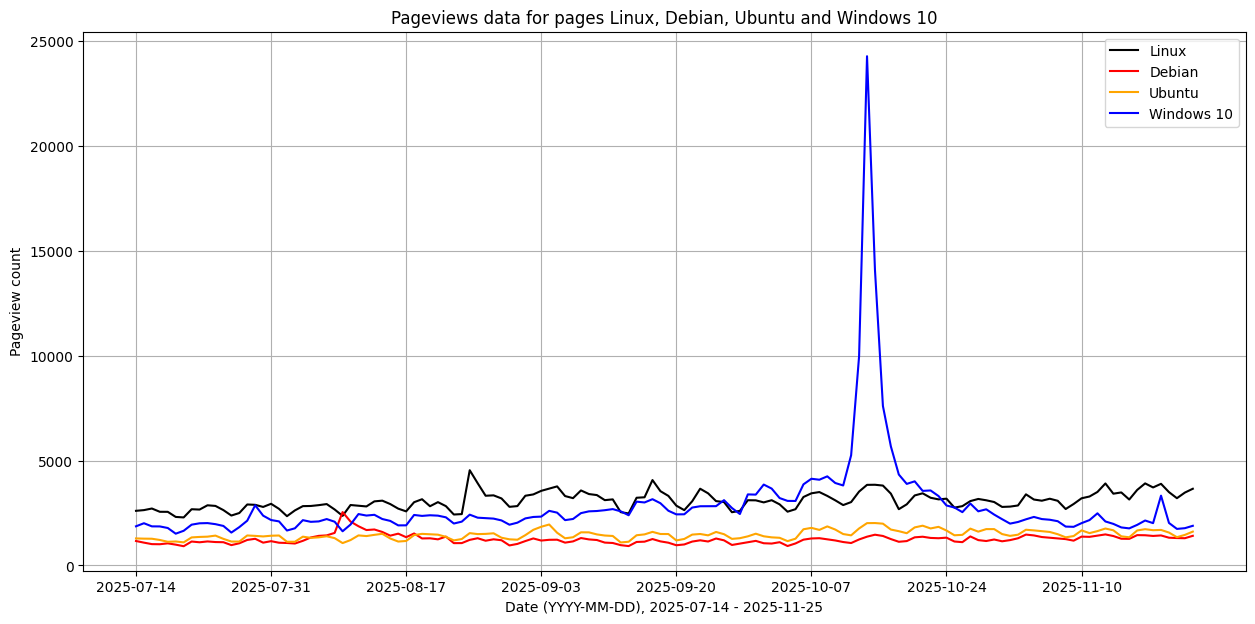

In [12]:
plt.figure(figsize=(15,7))
plt.grid(visible=True)

data_start_period = datetime.date(year=2015, month=7, day=1)
win10_start_period = datetime.date(year=2025, month=7, day=14)
win10_end_period = datetime.date(year=2025, month=11, day=25)

number_of_days = (win10_end_period-win10_start_period).days
start_index = (win10_start_period-data_start_period).days

plt.plot(pageviews_data["Linux"].iloc[start_index:start_index+number_of_days], color="black")
plt.plot(pageviews_data["Debian"].iloc[start_index:start_index+number_of_days], color="red")
plt.plot(pageviews_data["Ubuntu"].iloc[start_index:start_index+number_of_days], color="orange")
plt.plot(pageviews_data["Windows 10"].iloc[start_index:start_index+number_of_days], color="blue")
plt.title("Pageviews data for pages Linux, Debian, Ubuntu and Windows 10")

# End of support at 2025-10-14 (Windows 10), so plot the previous and the next period (3 months before, 1 months after) to observe the effect
plt.xlabel("Date (YYYY-MM-DD), 2025-07-14 - 2025-11-25")
x_labels = []
for i in range(8):
    x_labels.append(str(win10_start_period + datetime.timedelta(days=17)*i))
    
print(x_labels)
plt.xticks(ticks=range(start_index, start_index+number_of_days, 17), labels=x_labels)
plt.ylabel("Pageview count")
plt.legend(["Linux", "Debian", "Ubuntu", "Windows 10"])
plt.savefig("visuals/win10_linux_debian_ubuntu_pageviews_plot.svg", format="svg")

There is a spike in pageviews count of Windows 10 around end of the support date (October 10, 2025)

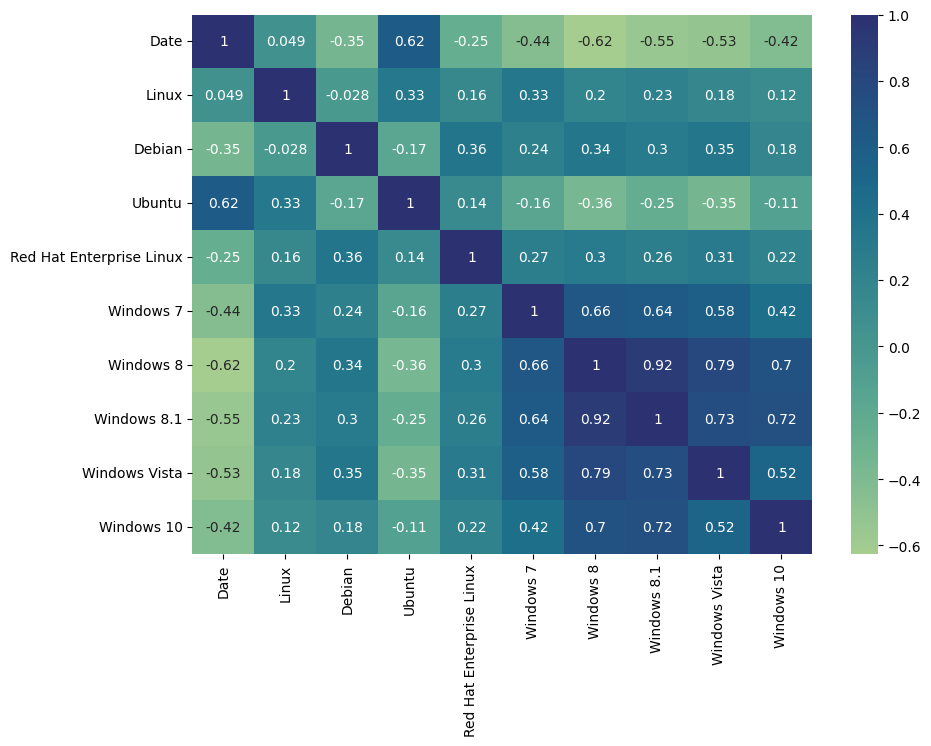

In [13]:
import seaborn as sns

pageviews_data["Date"] = pd.to_datetime(pageviews_data["Date"])
correlation_matrix_pageviews = pageviews_data.corr()

plt.figure(figsize=(10,7))
hmap = sns.heatmap(correlation_matrix_pageviews, annot=True, cmap='crest')
plt.show()
fig = hmap.get_figure()
fig.savefig("visuals/heatmap_pageviewsdata.svg", bbox_inches="tight")

We can observe that there exists a positive correlation between linux and windows 7, linux and windows 8, linux and windows 8.1, linux and windows vista, and linux and windows 10

<h2>Hypothesis 1</h2>
<p><strong>H0 (Null Hypothesis)</strong>: End of support for windows 7 did not lead to an increase in pageview count of linux</p>
<p><strong>H1 (Alternate Hypothesis)</strong>: End of support for windows 7 lead to an increase in pageview count of linux</p>

Since the distribution of pageviews of windows 7 and linux are not similar to a standard normal distribution, using mann-whitney u test (one-tailed) is a better choice compared to a t-test, since it's non-parametric.

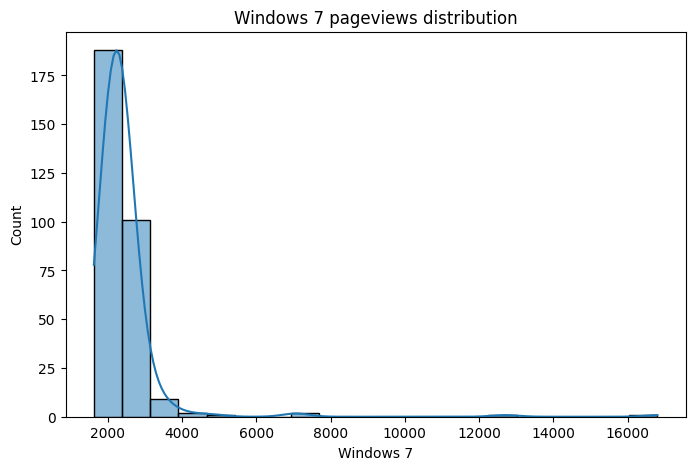

Average: 2414.944262295082, 4157.304918032787
Variance: 1341821.7313195376, 385238.50046761625
Statistic: 2258.0, p-value: 1.0


In [14]:
import scipy
number_of_days = (win7_end_period-win7_start_period).days
start_index = (win7_start_period-data_start_period).days

windows7_pageviews = pageviews_data["Windows 7"].iloc[start_index:start_index+number_of_days]
linux_pageviews = pageviews_data["Linux"].iloc[start_index:start_index+number_of_days]


# To show the skewed distribution
plt.figure(figsize=(8, 5))
sns.histplot(windows7_pageviews, kde=True, bins=20)
plt.title('Windows 7 pageviews distribution')
plt.show()

windows7_pageviews_average = windows7_pageviews.mean(axis=0,skipna=True) 
windows7_pageviews_variance = np.var(windows7_pageviews)
linux_pageviews_average = linux_pageviews.mean(axis=0,skipna=True) 
linux_pageviews_variance = np.var(linux_pageviews)

print(f"Average: {windows7_pageviews_average}, {linux_pageviews_average}")
print(f"Variance: {windows7_pageviews_variance}, {linux_pageviews_variance}")

stat, p_val = scipy.stats.mannwhitneyu(windows7_pageviews, linux_pageviews, alternative="greater") 
print(f"Statistic: {stat}, p-value: {p_val}")

Hence we can reject null hypothesis, since p < 0.05

<h2>Hypothesis 2</h2>
<p><strong>H0 (Null Hypothesis)</strong>: End of support for windows 8.1 did not lead to an increase in pageview count of linux</p>
<p><strong>H1 (Alternate Hyptohesis)</strong>: End of support for windows 8.1 lead to an increase in pageview count of linux</p>

Since the distribution of pageviews of windows 8.1 and linux are not similar to a standard normal distribution, using mann-whitney u test (one-tailed) is a better choice compared to a t-test, since it's non-parametric and since we are investigating if there's an increase, using one-tailed is a more suitable choice.

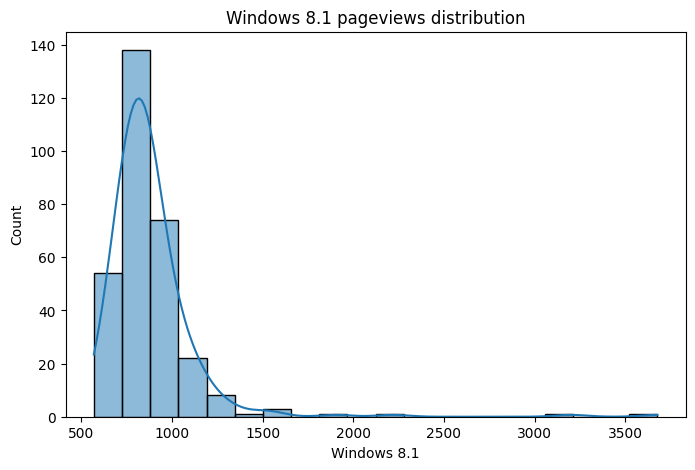

Average: 884.2467105263158, 11569.644736842105
Variance: 77805.06084444253, 4067202.4987880886
statistic: 0.0, p-value: 1.0


In [15]:
number_of_days = (win81_end_period-win81_start_period).days
start_index = (win81_start_period-data_start_period).days

windows81_pageviews = pageviews_data["Windows 8.1"].iloc[start_index:start_index+number_of_days]
linux_pageviews = pageviews_data["Linux"].iloc[start_index:start_index+number_of_days]

plt.figure(figsize=(8, 5))
sns.histplot(windows81_pageviews, kde=True, bins=20)
plt.title('Windows 8.1 pageviews distribution')
plt.show()

windows81_pageviews_average = windows81_pageviews.mean(axis=0,skipna=True) 
windows81_pageviews_variance = np.var(windows81_pageviews)
linux_pageviews_average = linux_pageviews.mean(axis=0,skipna=True) 
linux_pageviews_variance = np.var(linux_pageviews)

print(f"Average: {windows81_pageviews_average}, {linux_pageviews_average}")
print(f"Variance: {windows81_pageviews_variance}, {linux_pageviews_variance}")

stat, p_val = scipy.stats.mannwhitneyu(windows81_pageviews, linux_pageviews, alternative="greater") 
print(f"statistic: {stat}, p-value: {p_val}")

Hence we can reject null hypothesis, since p < 0.05

<h1>Hypothesis 3</h1>
<p><strong>H0 (Null Hypothesis)</strong>: End of support for windows 10 did not lead to an increase in pageview count of linux</p>
<p><strong>H1 (Alternate Hypothesis)</strong>: End of support for windows 10 lead to an increase in pageview count of linux</p>

Same as previous ones, applying a mann-whitney u test (one-tailed) is a better idea for this scenario.

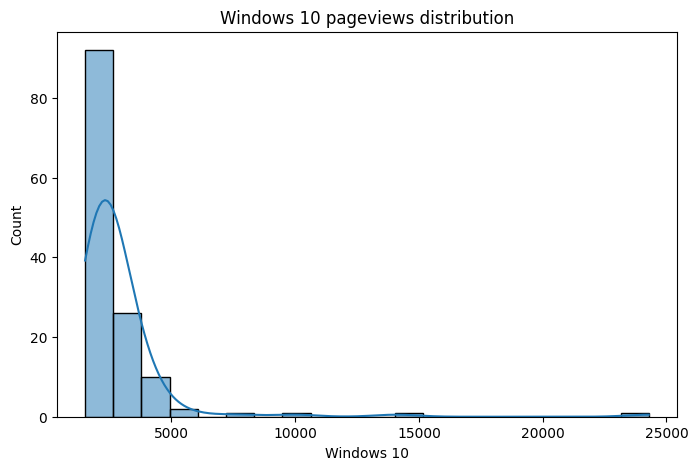

Average: 2861.373134328358, 3080.492537313433
Variance: 5544090.084651369, 173013.56337714414
statistic: 4054.5, p-value: 0.9999999999999958


In [16]:
number_of_days = (win10_end_period-win10_start_period).days
start_index = (win10_start_period-data_start_period).days

windows10_pageviews = pageviews_data["Windows 10"].iloc[start_index:start_index+number_of_days]
linux_pageviews = pageviews_data["Linux"].iloc[start_index:start_index+number_of_days]

plt.figure(figsize=(8, 5))
sns.histplot(windows10_pageviews, kde=True, bins=20)
plt.title('Windows 10 pageviews distribution')
plt.show()

windows10_pageviews_average = windows10_pageviews.mean(axis=0,skipna=True) 
windows10_pageviews_variance = np.var(windows10_pageviews)
linux_pageviews_average = linux_pageviews.mean(axis=0,skipna=True) 
linux_pageviews_variance = np.var(linux_pageviews)

print(f"Average: {windows10_pageviews_average}, {linux_pageviews_average}")
print(f"Variance: {windows10_pageviews_variance}, {linux_pageviews_variance}")

stat, p_val = scipy.stats.mannwhitneyu(windows10_pageviews, linux_pageviews, alternative="greater") 
print(f"statistic: {stat}, p-value: {p_val}")

In [17]:
github_star_watcher_data = pd.read_csv("data/github_repos_stars_watchers.csv")
github_star_watcher_data.rename({"Day":"Date"}, axis=1, inplace=True)
github_star_watcher_data.head()

,Year,Month,Date,Name,Stars,Watchers,URL
0,2015,1,2015-01,0xAX/linux-insides,31599,31599,https://github.com/0xAX/linux-insides
1,2015,1,2015-01,fluent/fluent-bit,7477,7477,https://github.com/fluent/fluent-bit
2,2015,1,2015-01,rancher/os,6443,6443,https://github.com/rancher/os
3,2015,1,2015-01,gliderlabs/docker-alpine,5710,5710,https://github.com/gliderlabs/docker-alpine
4,2015,1,2015-01,AtomicGameEngine/AtomicGameEngine,3377,3377,https://github.com/AtomicGameEngine/AtomicGame...


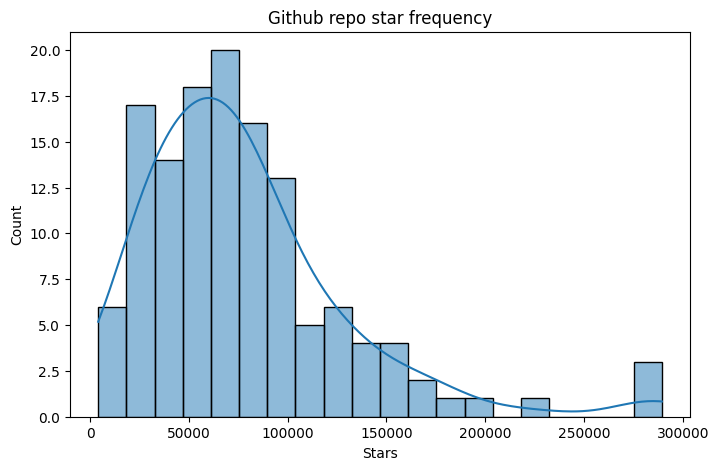

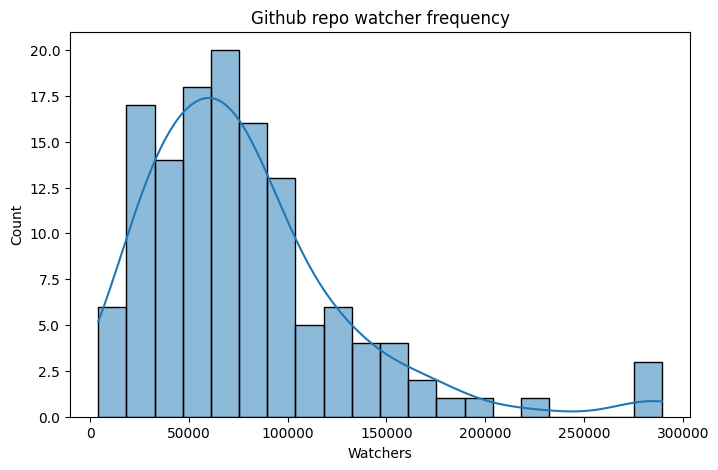

In [18]:
github_star_watcher_data_aggregated = github_star_watcher_data.groupby("Date").agg({"Stars":"sum", "Watchers":"sum"})   
github_star_watcher_data_aggregated.tail()

plt.figure(figsize=(8, 5))
sns.histplot(github_star_watcher_data_aggregated["Stars"], kde=True, bins=20)
plt.title('Github repo star frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(github_star_watcher_data_aggregated["Watchers"], kde=True, bins=20)
plt.title('Github repo watcher frequency')
plt.show()

<h2>Hypothesis 4</h2>
<p><strong>H0 (Null Hypothesis)</strong>: End of support for windows 8.1 did not increase of number of stars given to repositories with keyword "linux"</p>
<p><strong>H1 (Alternate Hypothesis)</strong>: End of support for windows 8.1 increased number of stars given to repositories with keyword "linux"</p>

Instead of using mann-whitney u test, applying log-transformation and running t-test for this scenario.

In [19]:
number_of_days = (win81_end_period-win81_start_period).days
start_index = (win81_start_period-data_start_period).days


# Applying log-transformation, to get approx. std normal distribution
stars_after_log = np.log1p(github_star_watcher_data_aggregated["Stars"].loc["2015-1":"2023-01"])
stars_before_log = np.log1p(github_star_watcher_data_aggregated["Stars"].loc["2023-01":])

t_stat, p_val = scipy.stats.ttest_ind(stars_after_log, stars_before_log, alternative='greater')

In [20]:
print(f"t-statistic: {stat}, p-value: {p_val}")

t-statistic: 4054.5, p-value: 1.7729297884570052e-14


In [21]:
print(market_share_data.columns.values)

['Date' 'Windows' 'Linux' 'Unnamed: 10']


<h2>Applying ML Methods</h2>
<p>Applying <strong>polynomial regression</strong> (degree 3) to linux market share</p>

Polynomial Regression (Degree 3)
R-Squared Score: 0.9470
RMSE: 0.2079


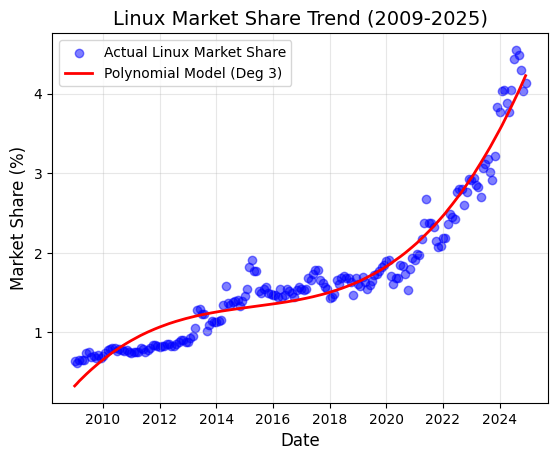

In [23]:
# --- Machine Learning Section: Polynomial Regression for Linux Market Share ---
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1. Prepare the Data
# Convert 'Date' to datetime objects for plotting
market_share_data['Date'] = pd.to_datetime(market_share_data['Date'])

# Create a numerical independent variable (X) representing time (e.g., Month Index)
# Using ordinal dates or simple index prevents numerical overflow issues with polynomials
market_share_data['Time_Step'] = np.arange(len(market_share_data))

X = market_share_data[['Time_Step']]  # Independent Variable
y = market_share_data['Linux']        # Dependent Variable

# construct Polynomial Features
# Degree 3 allows the model to curve (e.g., slow start, faster growth)
poly_degree = 3 
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly = poly_features.fit_transform(X)

# 3. Fit the Linear Regression Model
model = LinearRegression()
model.fit(X_poly, y)

# 4. Generate Predictions for the entire timeline
y_pred = model.predict(X_poly)

# 5. Evaluation
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"Polynomial Regression (Degree {poly_degree})")
print(f"R-Squared Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# 6. Visualization plt.figure(figsize=(14, 7))
plt.scatter(market_share_data['Date'], y, color='blue', alpha=0.5, label='Actual Linux Market Share')
plt.plot(market_share_data['Date'], y_pred, color='red', linewidth=2, label=f'Polynomial Model (Deg {poly_degree})')

plt.title(f'Linux Market Share Trend (2009-2025)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Market Share (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

<p>Applying <strong>polynomial regression</strong> (degree 3) to windows market share</p>

Polynomial Regression (Degree 3)
R-Squared Score: 0.9418
RMSE: 1.9153


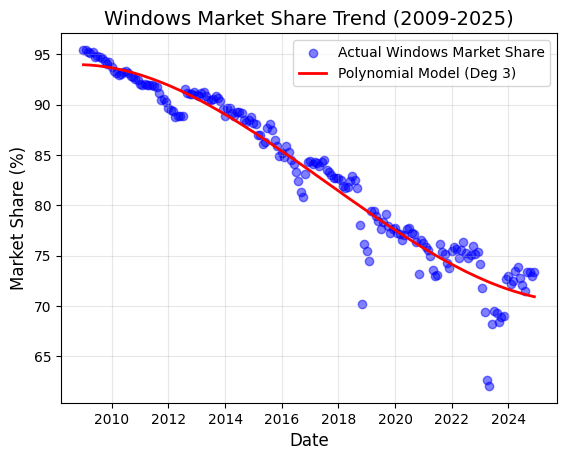

In [24]:
# 1. Prepare the Data
# Convert 'Date' to datetime objects for plotting
market_share_data['Date'] = pd.to_datetime(market_share_data['Date'])

# Create a numerical independent variable (X) representing time (e.g., Month Index)
market_share_data['Time_Step'] = np.arange(len(market_share_data))

X = market_share_data[['Time_Step']]  # Independent Variable
y = market_share_data['Windows']        # Dependent Variable

poly_degree = 3 
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"Polynomial Regression (Degree {poly_degree})")
print(f"R-Squared Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.scatter(market_share_data['Date'], y, color='blue', alpha=0.5, label='Actual Windows Market Share')
plt.plot(market_share_data['Date'], y_pred, color='red', linewidth=2, label=f'Polynomial Model (Deg {poly_degree})')

plt.title(f'Windows Market Share Trend (2009-2025)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Market Share (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()